In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path ='/content/drive/MyDrive/sesac_ai/code/deeplearning/data/house_train.csv'

df=pd.read_csv(path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#결측치 확인
df.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [6]:
#카테고리(범주형) 데이터 처리
#0,1fh 변환환
pd.get_dummies(df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [7]:
df = pd.get_dummies(df)
df[:10]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [8]:
df.mean()

Id                         730.500000
MSSubClass                  56.897260
LotFrontage                 70.049958
LotArea                  10516.828082
OverallQual                  6.099315
                             ...     
SaleCondition_AdjLand        0.002740
SaleCondition_Alloca         0.008219
SaleCondition_Family         0.013699
SaleCondition_Normal         0.820548
SaleCondition_Partial        0.085616
Length: 290, dtype: float64

In [9]:
df = df.fillna(df.mean())
df[:10]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [10]:
#eda
#속성별 관련도 추출

df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [11]:
df_corr = df.corr()


#집 값과 관련도가 큰 순서대로 저장하고 싶다.
df_corr.sort_values('SalePrice', ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,...,-0.027475,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
GrLivArea,0.008273,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,...,-0.022348,0.168368,-0.036522,-0.121102,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239
GarageCars,0.016570,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,...,-0.044502,0.286290,-0.087089,-0.197458,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164
GarageArea,0.017634,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,...,-0.041904,0.296671,-0.080601,-0.218665,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MasVnrType_None,0.024897,-0.023867,-0.121677,-0.032418,-0.397955,0.160227,-0.426399,-0.240784,-0.684299,-0.235217,...,0.024834,-0.172209,0.037687,0.132540,0.039705,0.016873,0.013870,-0.010018,0.094590,-0.169202
GarageFinish_Unf,-0.007513,-0.008807,-0.188336,-0.068099,-0.422479,0.203629,-0.523233,-0.414376,-0.222367,-0.179000,...,-0.001712,-0.238934,-0.007466,0.172316,0.039162,-0.017490,0.062021,0.044406,0.118008,-0.232554
BsmtQual_TA,0.033795,-0.138741,-0.066531,-0.044874,-0.497957,0.280779,-0.631734,-0.495485,-0.187406,-0.121785,...,0.018342,-0.265143,-0.010153,0.161940,0.103767,0.005852,-0.050903,0.060591,0.113021,-0.258953
KitchenQual_TA,-0.014973,-0.010836,-0.136764,-0.031154,-0.553891,0.046947,-0.459792,-0.576964,-0.195807,-0.108876,...,-0.012126,-0.274335,0.045067,0.178612,0.065613,0.025849,0.060068,0.034549,0.128151,-0.273826


In [12]:
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

In [13]:
#집 값과 관련도가 가장 큰 10개의 속성만 추출, 출력 
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [14]:
abs(df_corr_sort['SalePrice'].head(10))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [15]:
df_corr_sort['SalePrice'].head(10).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [16]:
#집 값과 관련도 가장 높은 순으로 추출된 상관된 그래프 그리기

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd']
df_top10 = df[cols]
df_top10

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd
0,208500,7,1710,2,548,856,856,2,0,8
1,181500,6,1262,2,460,1262,1262,2,0,6
2,223500,7,1786,2,608,920,920,2,0,6
3,140000,7,1717,3,642,756,961,1,0,7
4,250000,8,2198,3,836,1145,1145,2,0,9
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,0,7
1456,210000,6,2073,2,500,1542,2073,2,0,7
1457,266500,7,2340,1,252,1152,1188,2,0,9
1458,142125,5,1078,1,240,1078,1078,1,0,5


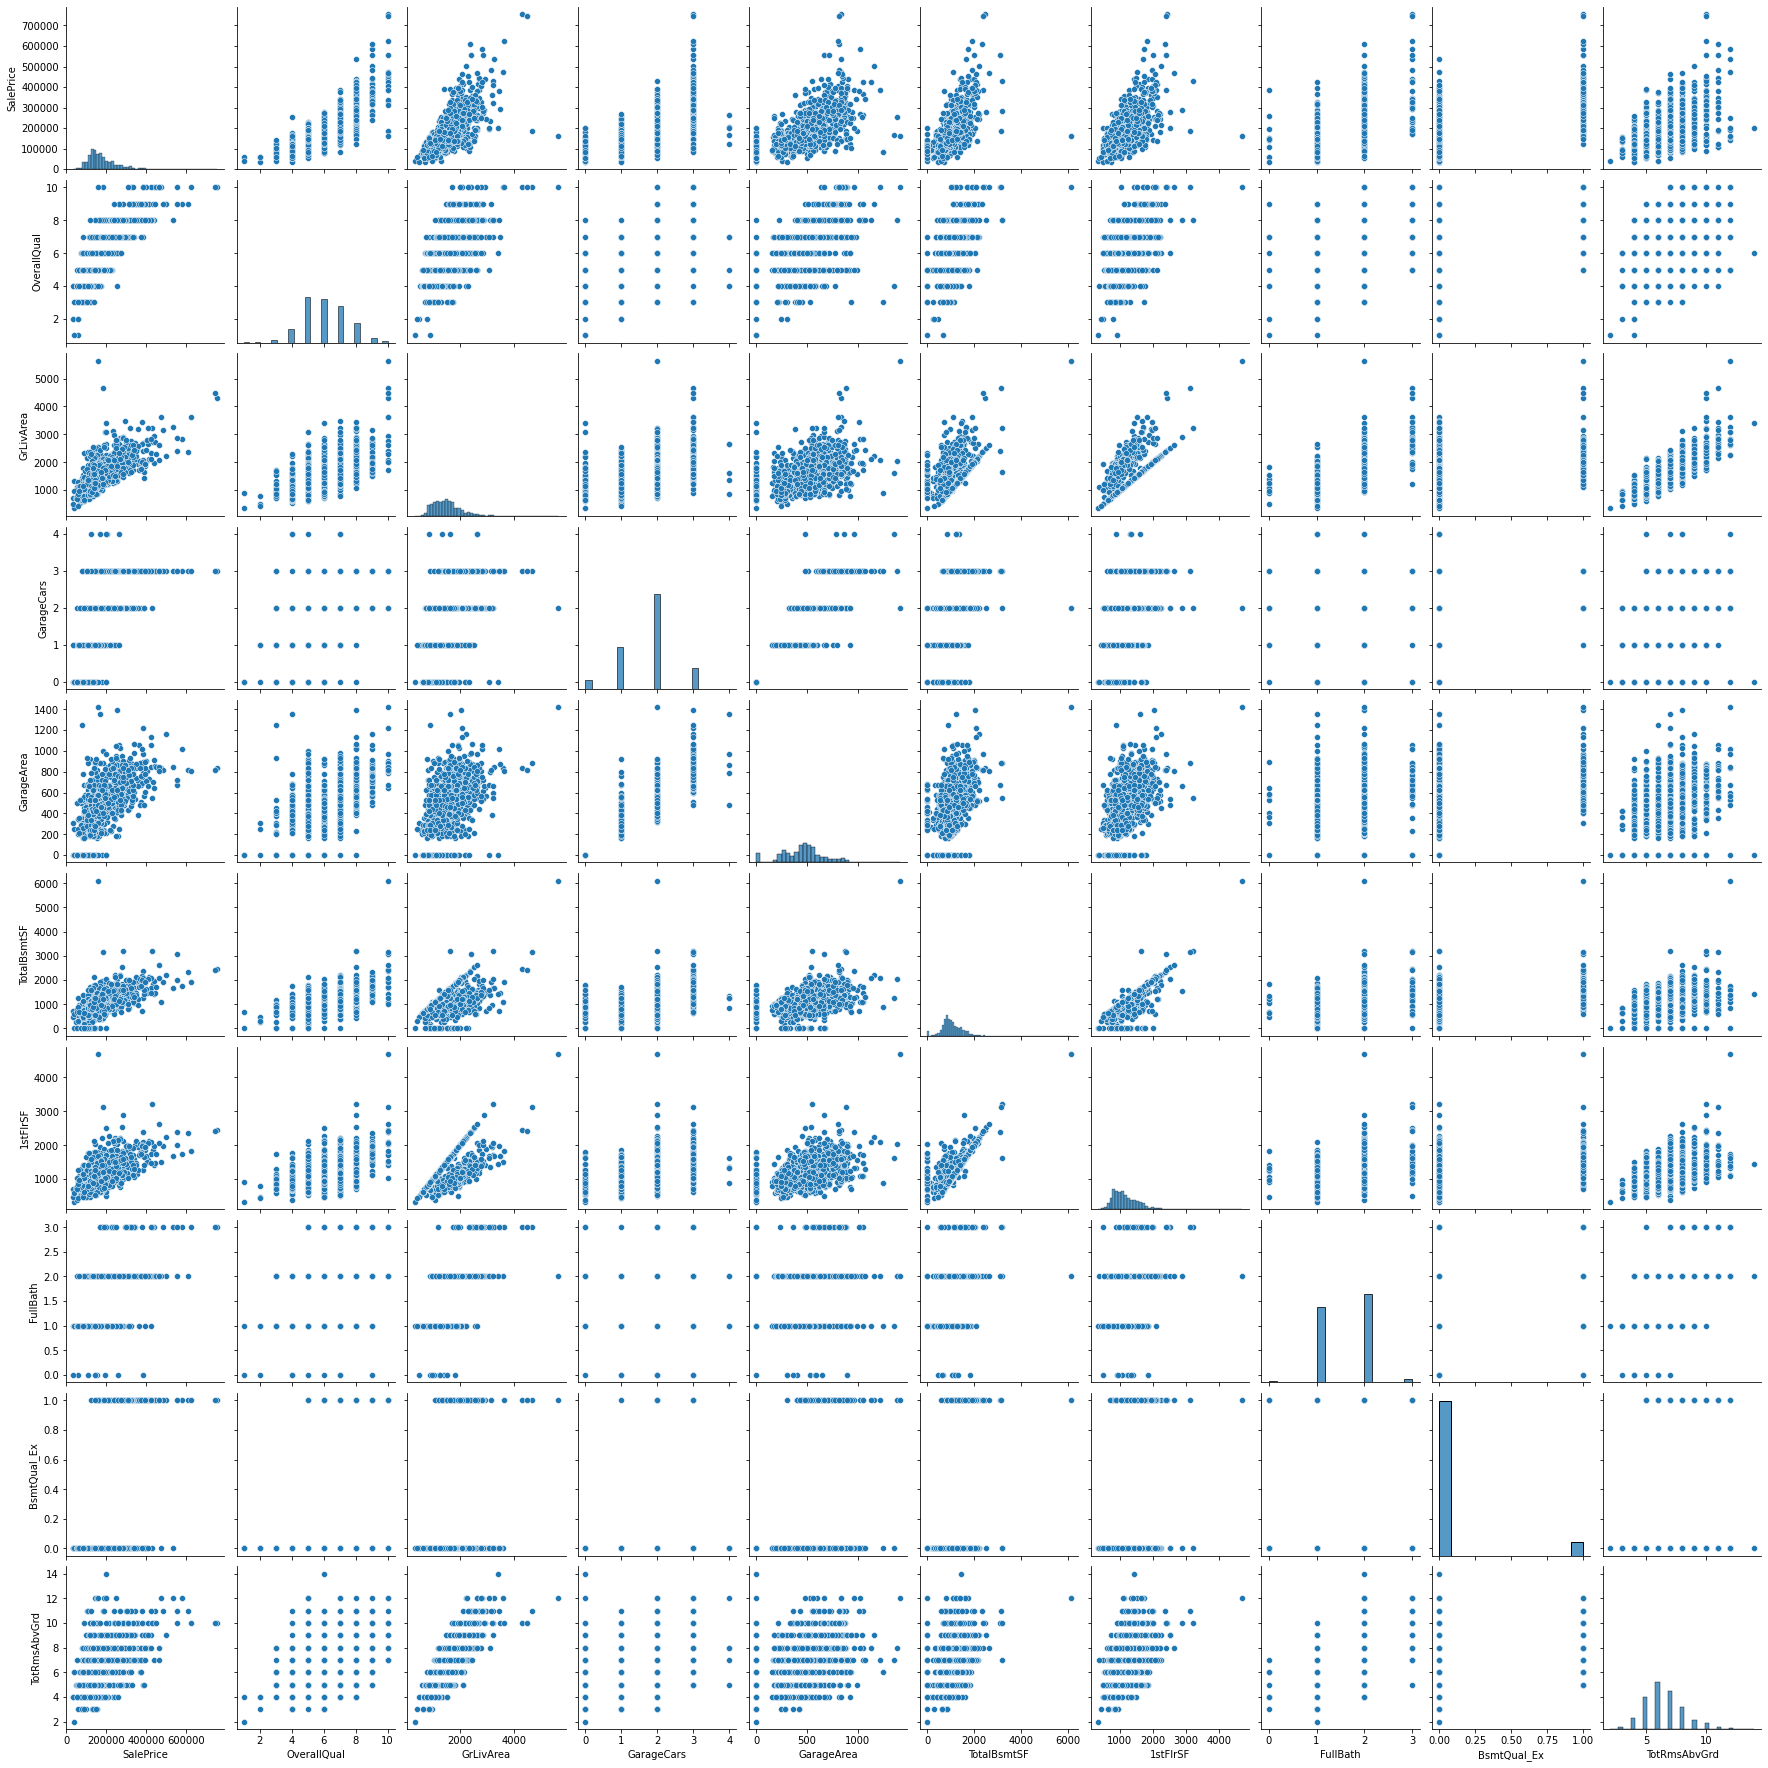

In [17]:
sns.pairplot(df_top10)
plt.show()

In [18]:
#주택 가격 예측
#집 값 제외 , 속성 정보만 추출

x_train = df[cols].iloc[:, 1:]
x_train[:10]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd
0,7,1710,2,548,856,856,2,0,8
1,6,1262,2,460,1262,1262,2,0,6
2,7,1786,2,608,920,920,2,0,6
3,7,1717,3,642,756,961,1,0,7
4,8,2198,3,836,1145,1145,2,0,9
5,5,1362,2,480,796,796,1,0,5
6,8,1694,2,636,1686,1694,2,1,7
7,7,2090,2,484,1107,1107,2,0,7
8,7,1774,2,468,952,1022,2,0,8
9,5,1077,1,205,991,1077,1,0,5


In [19]:
#집 값만 저장
y =df['SalePrice'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#학습셋 테스트셋 구분

x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2)

In [22]:
x_train.shape

(1168, 9)

In [25]:
#딥러닝 모델 구조 설정

model=Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30,  activation='relu'))
model.add(Dense(40,  activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [29]:
#모델 실행 
model.compile(loss='mean_squared_error', optimizer='adam')

#조기 종료
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=20)

#모델 이름 정하기
modelpath='/content/drive/MyDrive/sesac_ai/code/deeplearning/data/model/house.hdf5'

#최적화 모델 업데이트 > 저장
checkpoint=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#전체 데이터의 20% 검증셋 (val_set) 설정
model.fit(x_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpoint])

Epoch 1/2000
17/28 [=================>............] - ETA: 0s - loss: 38704455680.0000  
Epoch 1: val_loss improved from inf to 40386736128.00000, saving model to /content/drive/MyDrive/sesac_ai/code/deeplearning/data/model/house.hdf5
28/28 [==============================] - 6s 15ms/step - loss: 37496262656.0000 - val_loss: 40386736128.0000
Epoch 2/2000
17/28 [=================>............] - ETA: 0s - loss: 37805854720.0000
Epoch 2: val_loss improved from 40386736128.00000 to 39735783424.00000, saving model to /content/drive/MyDrive/sesac_ai/code/deeplearning/data/model/house.hdf5
28/28 [==============================] - 0s 13ms/step - loss: 37049692160.0000 - val_loss: 39735783424.0000
Epoch 3/2000
27/28 [===========================>..] - ETA: 0s - loss: 35964071936.0000
Epoch 3: val_loss improved from 39735783424.00000 to 38292537344.00000, saving model to /content/drive/MyDrive/sesac_ai/code/deeplearning/data/model/house.hdf5
28/28 [==============================] - 0s 16ms/step -

In [30]:
#예측값과 실제값, 실행번호가 들어갈 빈 리스트 생성

real_price = []
pred_price= []
x_num = []

# 임의로 40개만 뽑아서 실제값, 예측값 출력
n_iter = 0
#model.predict(x_test)
y_pred = model.predict(x_test).flatten()

for i in range(40):
    real = y_test[i]
    pred = y_pred[i]
    print('실제가격: {:.2f}. 예상 가격: {:.2f}'.format(real, pred))
    real_price.append(real)
    pred_price.append(pred)
    n_iter=n_iter+1
    x_num.append(n_iter)


10/10 [==============================] - 0s 2ms/step
실제가격: 160000.00. 예상 가격: 193137.20
실제가격: 97000.00. 예상 가격: 89465.57
실제가격: 187000.00. 예상 가격: 187881.58
실제가격: 315000.00. 예상 가격: 286308.72
실제가격: 285000.00. 예상 가격: 298926.59
실제가격: 287000.00. 예상 가격: 312565.56
실제가격: 280000.00. 예상 가격: 208307.27
실제가격: 129000.00. 예상 가격: 112080.24
실제가격: 128000.00. 예상 가격: 123818.10
실제가격: 179900.00. 예상 가격: 194173.27
실제가격: 259500.00. 예상 가격: 206336.94
실제가격: 143000.00. 예상 가격: 149982.14
실제가격: 128950.00. 예상 가격: 124331.23
실제가격: 255000.00. 예상 가격: 220410.06
실제가격: 161000.00. 예상 가격: 147001.30
실제가격: 110000.00. 예상 가격: 119780.13
실제가격: 144000.00. 예상 가격: 123989.49
실제가격: 120000.00. 예상 가격: 116887.02
실제가격: 155000.00. 예상 가격: 166495.36
실제가격: 93000.00. 예상 가격: 81455.34
실제가격: 79000.00. 예상 가격: 92428.40
실제가격: 93000.00. 예상 가격: 144036.27
실제가격: 125500.00. 예상 가격: 117450.59
실제가격: 177500.00. 예상 가격: 144174.09
실제가격: 149900.00. 예상 가격: 197021.42
실제가격: 175900.00. 예상 가격: 175181.95
실제가격: 171500.00. 예상 가격: 170605.00
실제가격: 167900.00. 예상 가격: 192964.39
실제

In [31]:
cols=[real_price, pred_price]
pd.DataFrame(cols).T

,0,1
0,160000.0,193137.203125
1,97000.0,89465.570312
2,187000.0,187881.578125
3,315000.0,286308.718750
4,285000.0,298926.593750
5,287000.0,312565.562500
6,280000.0,208307.265625
7,129000.0,112080.242188
8,128000.0,123818.101562
9,179900.0,194173.265625


In [32]:
df=pd.DataFrame(cols).T
df.columns=['실제 가격', '예측 가격']
df.index = df.index+1
df.head()

,실제 가격,예측 가격
1,160000.0,193137.203125
2,97000.0,89465.570312
3,187000.0,187881.578125
4,315000.0,286308.718750
5,285000.0,298926.593750


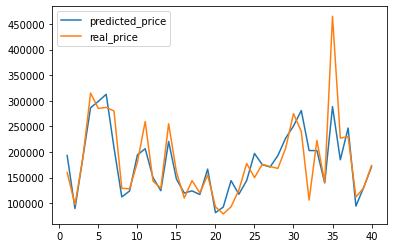

In [33]:
#그래프 그리기

plt.plot(df.index, pred_price, label='predicted_price')
plt.plot(df.index, real_price, label='real_price')
plt.legend()
plt.show()

In [35]:
diff = df['실제 가격']-df['예측 가격']
df['오차']=diff
columns= ['실제 가격', '예측 가격', '오차'] 
df.head()

,실제 가격,예측 가격,오차
1,160000.0,193137.203125,-33137.203125
2,97000.0,89465.570312,7534.429688
3,187000.0,187881.578125,-881.578125
4,315000.0,286308.718750,28691.281250
5,285000.0,298926.593750,-13926.593750
